In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

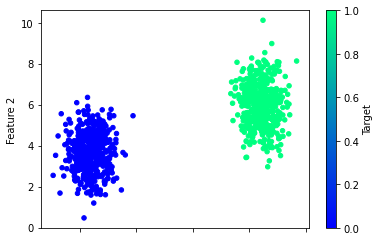

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 964us/step - loss: 0.7295 - accuracy: 0.5067
Epoch 2/100
24/24 [==============================] - 0s 739us/step - loss: 0.7227 - accuracy: 0.4013
Epoch 3/100
24/24 [==============================] - 0s 652us/step - loss: 0.7173 - accuracy: 0.3987
Epoch 4/100
24/24 [==============================] - 0s 609us/step - loss: 0.7126 - accuracy: 0.4187
Epoch 5/100
24/24 [==============================] - 0s 609us/step - loss: 0.7087 - accuracy: 0.4373
Epoch 6/100
24/24 [==============================] - 0s 652us/step - loss: 0.7052 - accuracy: 0.4507
Epoch 7/100
24/24 [==============================] - 0s 652us/step - loss: 0.7023 - accuracy: 0.4707
Epoch 8/100
24/24 [==============================] - 0s 652us/step - loss: 0.6995 - accuracy: 0.4920
Epoch 9/100
24/24 [==============================] - 0s 652us/step - loss: 0.6970 - accuracy: 0.5120
Epoch 10/100
24/24 [==============================] - 0s 652us/step - loss: 0.6947 - accura

24/24 [==============================] - 0s 652us/step - loss: 0.1790 - accuracy: 0.9773
Epoch 82/100
24/24 [==============================] - 0s 609us/step - loss: 0.1751 - accuracy: 0.9773
Epoch 83/100
24/24 [==============================] - 0s 609us/step - loss: 0.1712 - accuracy: 0.9787
Epoch 84/100
24/24 [==============================] - 0s 609us/step - loss: 0.1674 - accuracy: 0.9787
Epoch 85/100
24/24 [==============================] - 0s 652us/step - loss: 0.1637 - accuracy: 0.9800
Epoch 86/100
24/24 [==============================] - 0s 609us/step - loss: 0.1601 - accuracy: 0.9813
Epoch 87/100
24/24 [==============================] - 0s 652us/step - loss: 0.1566 - accuracy: 0.9827
Epoch 88/100
24/24 [==============================] - 0s 608us/step - loss: 0.1532 - accuracy: 0.9867
Epoch 89/100
24/24 [==============================] - 0s 609us/step - loss: 0.1498 - accuracy: 0.9880
Epoch 90/100
24/24 [==============================] - 0s 609us/step - loss: 0.1466 - accuracy: 

<AxesSubplot:>

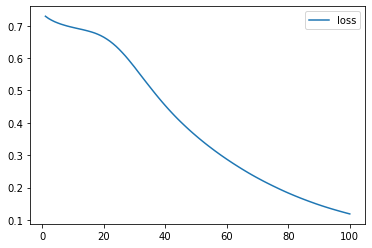

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

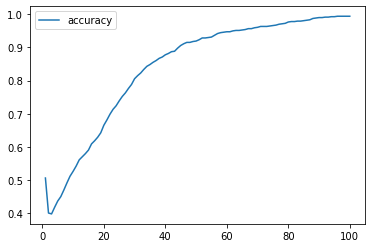

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1148 - accuracy: 0.9960 - 116ms/epoch - 14ms/step
Loss: 0.11477085947990417, Accuracy: 0.9959999918937683


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 63ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

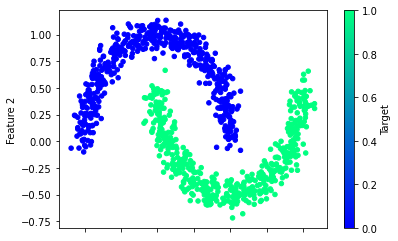

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 916us/step - loss: 1.4487 - accuracy: 0.3173
Epoch 2/100
24/24 [==============================] - 0s 624us/step - loss: 1.2847 - accuracy: 0.3333
Epoch 3/100
24/24 [==============================] - 0s 652us/step - loss: 1.1747 - accuracy: 0.3467
Epoch 4/100
24/24 [==============================] - 0s 652us/step - loss: 1.1002 - accuracy: 0.3627
Epoch 5/100
24/24 [==============================] - 0s 609us/step - loss: 1.0433 - accuracy: 0.3827
Epoch 6/100
24/24 [==============================] - 0s 652us/step - loss: 0.9998 - accuracy: 0.3960
Epoch 7/100
24/24 [==============================] - 0s 609us/step - loss: 0.9631 - accuracy: 0.4080
Epoch 8/100
24/24 [==============================] - 0s 609us/step - loss: 0.9323 - accuracy: 0.4200
Epoch 9/100
24/24 [==============================] - 0s 609us/step - loss: 0.9048 - accuracy: 0.4307
Epoch 10/100
24/24 [==============================] - 0s 652us/step - loss: 0.8809 - accura

24/24 [==============================] - 0s 643us/step - loss: 0.4334 - accuracy: 0.7773
Epoch 82/100
24/24 [==============================] - 0s 609us/step - loss: 0.4307 - accuracy: 0.7787
Epoch 83/100
24/24 [==============================] - 0s 609us/step - loss: 0.4279 - accuracy: 0.7813
Epoch 84/100
24/24 [==============================] - 0s 609us/step - loss: 0.4251 - accuracy: 0.7840
Epoch 85/100
24/24 [==============================] - 0s 641us/step - loss: 0.4223 - accuracy: 0.7920
Epoch 86/100
24/24 [==============================] - 0s 652us/step - loss: 0.4196 - accuracy: 0.7947
Epoch 87/100
24/24 [==============================] - 0s 652us/step - loss: 0.4167 - accuracy: 0.7960
Epoch 88/100
24/24 [==============================] - 0s 681us/step - loss: 0.4138 - accuracy: 0.7973
Epoch 89/100
24/24 [==============================] - 0s 649us/step - loss: 0.4108 - accuracy: 0.8000
Epoch 90/100
24/24 [==============================] - 0s 652us/step - loss: 0.4079 - accuracy: 

<AxesSubplot:>

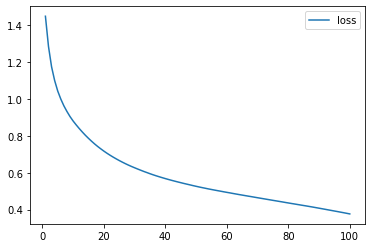

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

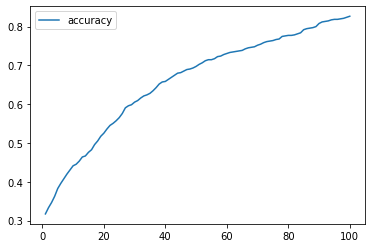

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 771us/step - loss: 0.6273 - accuracy: 0.5760
Epoch 2/100
24/24 [==============================] - 0s 662us/step - loss: 0.5931 - accuracy: 0.6893
Epoch 3/100
24/24 [==============================] - 0s 652us/step - loss: 0.5621 - accuracy: 0.7533
Epoch 4/100
24/24 [==============================] - 0s 696us/step - loss: 0.5339 - accuracy: 0.7853
Epoch 5/100
24/24 [==============================] - 0s 696us/step - loss: 0.5080 - accuracy: 0.7880
Epoch 6/100
24/24 [==============================] - 0s 696us/step - loss: 0.4842 - accuracy: 0.7920
Epoch 7/100
24/24 [==============================] - 0s 652us/step - loss: 0.4621 - accuracy: 0.7987
Epoch 8/100
24/24 [==============================] - 0s 652us/step - loss: 0.4421 - accuracy: 0.8133
Epoch 9/100
24/24 [==============================] - 0s 696us/step - loss: 0.4238 - accuracy: 0.8187
Epoch 10/100
24/24 [==============================] - 0s 783us/step - loss: 0.4078 - accura

24/24 [==============================] - 0s 609us/step - loss: 0.2280 - accuracy: 0.9027
Epoch 82/100
24/24 [==============================] - 0s 609us/step - loss: 0.2278 - accuracy: 0.9027
Epoch 83/100
24/24 [==============================] - 0s 609us/step - loss: 0.2275 - accuracy: 0.9027
Epoch 84/100
24/24 [==============================] - 0s 652us/step - loss: 0.2272 - accuracy: 0.9027
Epoch 85/100
24/24 [==============================] - 0s 652us/step - loss: 0.2271 - accuracy: 0.9027
Epoch 86/100
24/24 [==============================] - 0s 609us/step - loss: 0.2267 - accuracy: 0.9027
Epoch 87/100
24/24 [==============================] - 0s 652us/step - loss: 0.2266 - accuracy: 0.9027
Epoch 88/100
24/24 [==============================] - 0s 609us/step - loss: 0.2262 - accuracy: 0.9027
Epoch 89/100
24/24 [==============================] - 0s 652us/step - loss: 0.2261 - accuracy: 0.9027
Epoch 90/100
24/24 [==============================] - 0s 609us/step - loss: 0.2260 - accuracy: 